In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [94]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
display(df)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


Correlation between Chirps/Second and Ground Temperature


,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


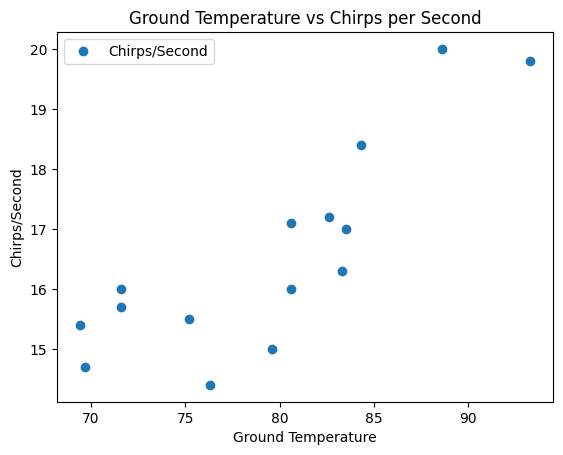

In [95]:
#find linear regression of the data
display(df.describe())
print("Correlation between Chirps/Second and Ground Temperature")
display(df.corr())
#plotting for visual EDA
df.plot(x='Ground Temperature',y='Chirps/Second', style="o")
plt.title('Ground Temperature vs Chirps per Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()
     

From the above plot and correlation matrix we can conclude there is a strong positive relationship between Chirps/Second and Ground Temperature

In [96]:
X=df['Ground Temperature']
X=X.to_frame()
y=df['Chirps/Second']
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression()

Displaying values of  Linear Regression.

In [97]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.4593146452359598
coefficient: [0.20299973]


2. Chart the original data and the equation on the chart.

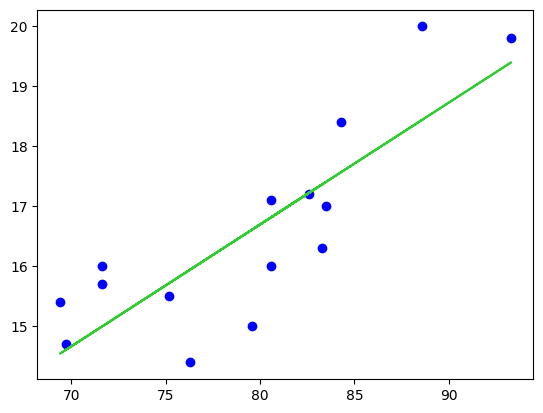

In [98]:
plt.scatter(X, y, color='blue')
plt.plot(X, linreg.predict(X), color='limegreen')

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [99]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.6922946529147004


4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [100]:
e=float(input())
p=linreg.predict([[e]])
hz=int(p.round())

ValueError: could not convert string to float: ''

In [ ]:
print("For the ground temperature ",str(e)," degree's F the possible chirps/sec", str(hz)," chirps/sec.")

For the ground temperature  79.0  degree's F the possible chirps/sec 16  chirps/sec.


5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
i=float(input())
x1=(i - linreg.intercept_) / linreg.coef_
x2=int(x1.round())
print("For ",str(i),"  chirps/sec the possible ground temperature", str(x2)," degree's F.")

For  20.0   chirps/sec the possible ground temperature 96  degree's F.


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


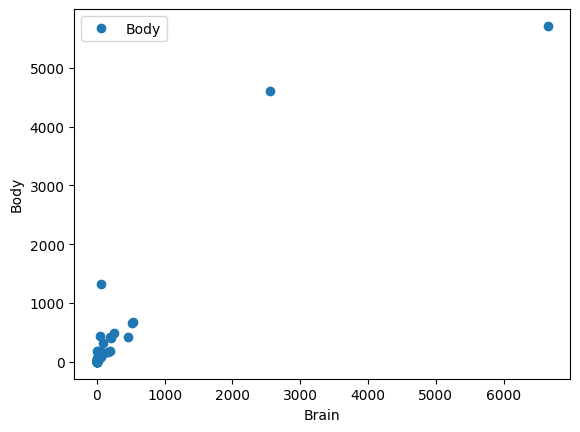

In [ ]:
df = pd.read_fwf("brain_body.txt")
display(df)
df.describe()
df.plot(x='Brain',y='Body', style='o')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

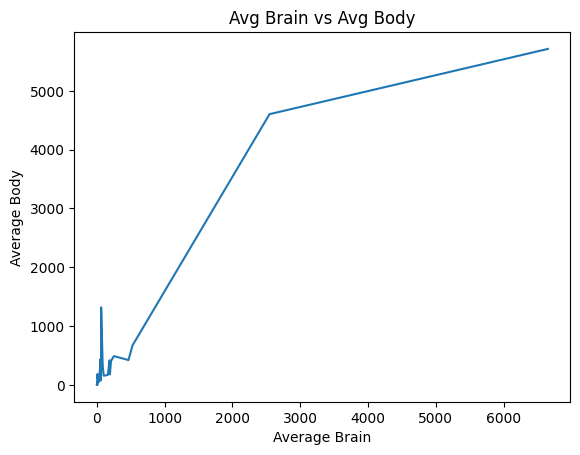

In [ ]:
df.groupby("Brain")["Body"].mean().plot()
plt.xlabel('Average Brain')
plt.ylabel('Average Body')
plt.title("Avg Brain vs Avg Body")
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
#preparing Data
X=df['Brain']
X=X.to_frame()
y=df['Body']
#modeling Data
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X, y)
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740681
coefficient: [0.96649637]


2. Chart the original data and the equation on the chart.

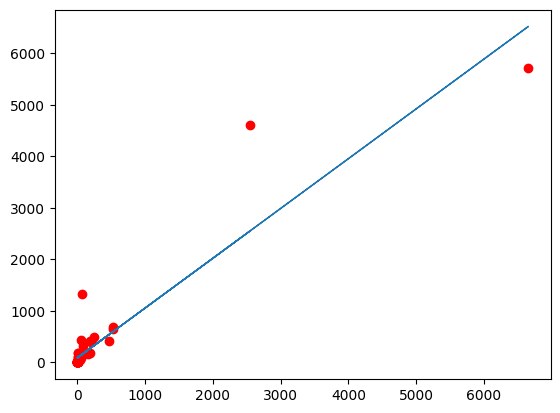

In [ ]:
#visualizing results
plt.scatter(X, y, color='red')
plt.plot(X, linreg.predict(X), linewidth=1)

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
display(df.describe())
display(df.dtypes)

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
#data cleaning
print(df.isnull().sum())
print("Sum of dupilicat rows and columns")
print(df.duplicated().sum())

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64
Sum of dupilicat rows and columns
0


Exploratry Data Analysis:
Data visualization:

<AxesSubplot: xlabel='Sex'>

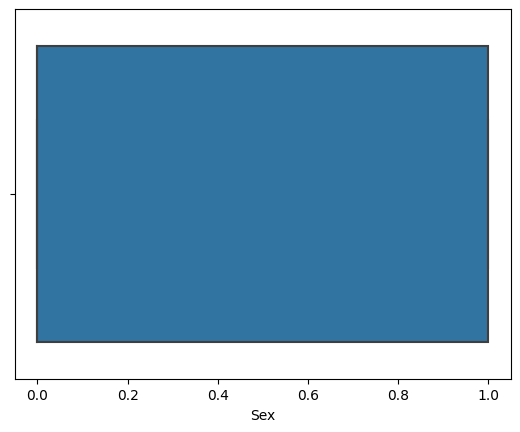

In [ ]:
import seaborn as sb
sb.boxplot(x = df["Sex"])

<AxesSubplot: xlabel='Rank'>

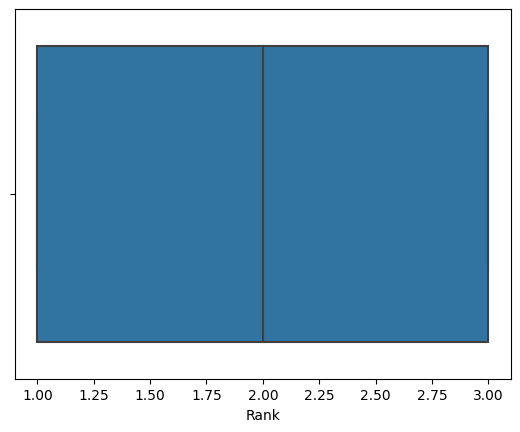

In [ ]:
sb.boxplot(x = df["Rank"])

<AxesSubplot: xlabel='Year'>

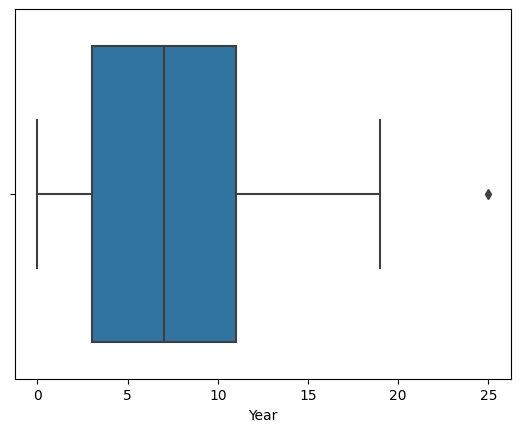

In [ ]:
sb.boxplot(x = df["Year"])

<AxesSubplot: xlabel='Degree'>

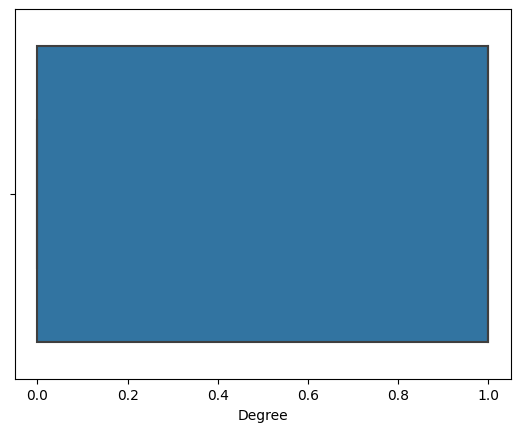

In [ ]:
sb.boxplot(x = df["Degree"])

<AxesSubplot: xlabel='YSdeg'>

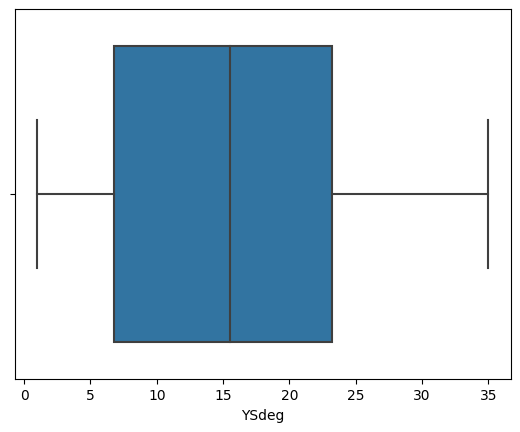

In [ ]:
sb.boxplot(x = df["YSdeg"])

<AxesSubplot: xlabel='Salary'>

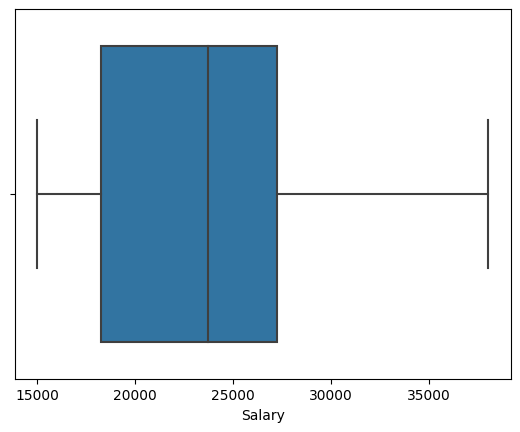

In [ ]:
sb.boxplot(x = df["Salary"])

Using IQR to find Outliers

In [ ]:
display(df.describe())
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
        for j in outliers[i]:
            print("Outlier is Presented in "+str(i)+" is "+str(j))
            print("\n")
    else:
      print("No Outlier is Presented in",i )
      print("\n")
  
outlier_presence(df)

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


Interquartile Range of Sex is 1.0
Lower Limit  -1.5
Upper Limit  2.5
No Outlier is Presented in Sex


Interquartile Range of Rank is 2.0
Lower Limit  -2.0
Upper Limit  6.0
No Outlier is Presented in Rank


Interquartile Range of Year is 8.0
Lower Limit  -9.0
Upper Limit  23.0
Outlier is Presented in Year is 25


Interquartile Range of Degree is 1.0
Lower Limit  -1.5
Upper Limit  2.5
No Outlier is Presented in Degree


Interquartile Range of YSdeg is 16.5
Lower Limit  -18.0
Upper Limit  48.0
No Outlier is Presented in YSdeg


Interquartile Range of Salary is 9011.75
Lower Limit  4729.125
Upper Limit  40776.125
No Outlier is Presented in Salary




One outliner was found in Year but this should not effect our model much thus we shall procced further.

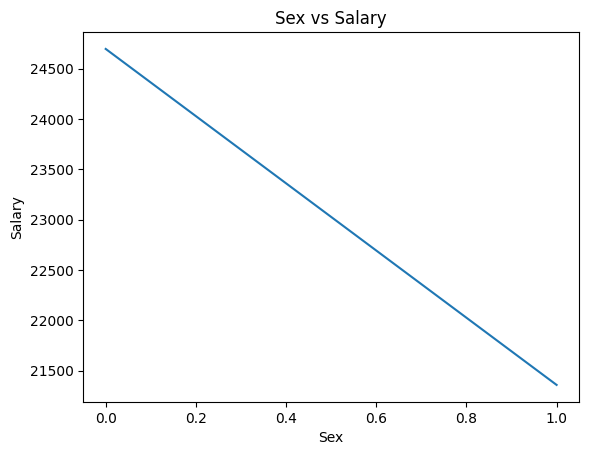

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
#df.plot(x = 'Sex', y='Salary', style = 'o')
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex', 'Salary']].corr()

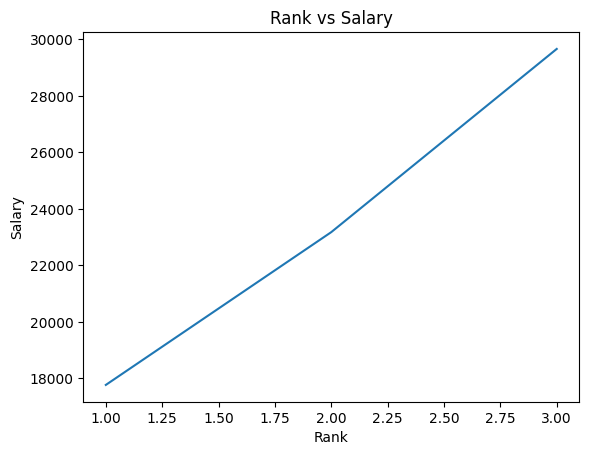

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
#df.plot(x = 'Rank', y='Salary', style = 'o')
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank', 'Salary']].corr()

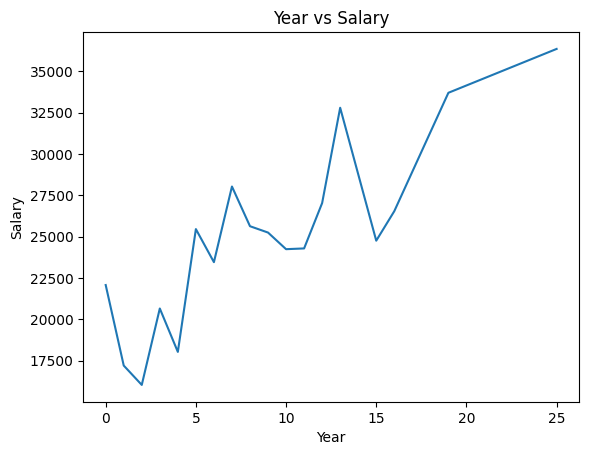

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
#df.plot(x = 'Year', y='Salary', style = 'o')
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year', 'Salary']].corr()

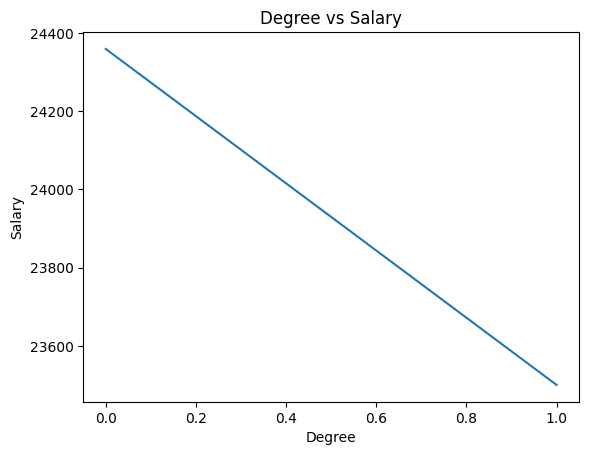

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
#df.plot(x = 'Degree', y='Salary', style = 'o')
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree', 'Salary']].corr()

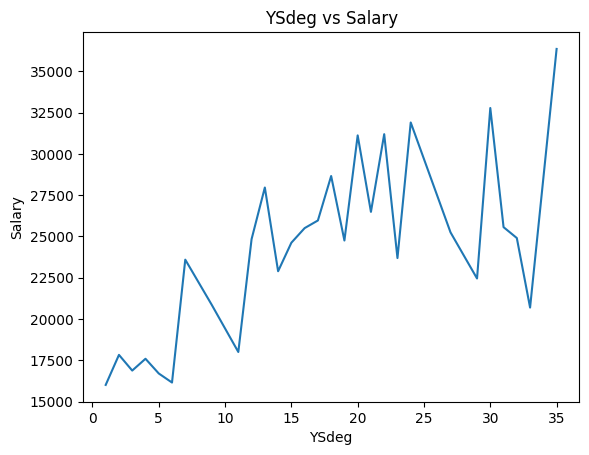

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
#df.plot(x = 'YSdeg', y='Salary', style = 'o')
df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg', 'Salary']].corr()

### By seeing Above plots and Correlation figures we can use Sex, Rank, Year, Degree, YSdeg as Feature to Develop Our Model

In [ ]:
#Spliting The Data Set In Train And Test For Developing Models
X = df.loc[:, ["Sex", "Rank", "Year", "Degree", "YSdeg"]].values 
y = df.loc[:, 'Salary'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled) 
y_pred

array([26995.76562111, 17417.30204142, 16667.81178635, 27727.47768059,
       20366.5283031 , 22927.1988723 , 26983.33844294, 24710.83799685,
       23272.9115122 , 16629.88697386, 31794.20492067, 24533.96597862,
       17755.50574325, 28476.96793566, 20209.91081305, 22788.25166657])

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df_coff = pd.DataFrame(regressor.coef_ , ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns= ['Cofficient'])
df_coff

,Cofficient
Sex,117.704379
Rank,4143.756868
Year,2709.385401
Degree,-620.565073
YSdeg,-879.820551


In [ ]:
print(regressor.intercept_) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

24012.527777777777
R2- SCORE: 0.7269935141465012


### 2. Find the selection of columns with the best  R2  score.

In [ ]:
def Selc_Col(df):
  for i in df.keys():
    if i != 'Salary':
      X = df.loc[:, [i]].values 
      y = df.loc[:, 'Salary'].values 
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
      scaler = StandardScaler() 
      scaler.fit(X_train,y_train) 
      X_train_scaled = scaler.transform(X_train) 
      X_test_scaled = scaler.transform(X_test) 
      regressor = LinearRegression()   
      regressor.fit(X_train_scaled, y_train)
      y_pred = regressor.predict(X_test_scaled) 
      print('R2- SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))
Selc_Col(df)

R2- SCORE of Sex is:  -0.5878693128870573
R2- SCORE of Rank is:  0.6415964187285661
R2- SCORE of Year is:  0.07791588611634925
R2- SCORE of Degree is:  -0.2199957939595265
R2- SCORE of YSdeg is:  -0.056591360254641065


## Rank has the best R^2 score

## 3. Report whether sex is a factor in salary.

Sex has a very low R^2 score thus it not factor in the report.